In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
df=pd.read_csv('musk_csv.csv',index_col='ID')

In [3]:
df.head()

,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
ID,,,,,,,,,,,,,,,,,,,,,
1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,...,-308,52,-7,39,126,156,-50,-112,96,1
2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,...,-59,-2,52,103,136,169,-61,-136,79,1
3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,...,-134,-154,57,143,142,165,-67,-145,39,1
4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,136,168,-60,-135,80,1
5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,137,168,-60,-135,80,1


In [4]:
len(df.columns)

169

In [5]:
# checking null values in the dataset
df.isnull().sum()

molecule_name        0
conformation_name    0
f1                   0
f2                   0
f3                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 169, dtype: int64

In [6]:
x=df.iloc[:,2:168]
y=df.iloc[:,168]

In [7]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)
X.shape

(6598, 166)

In [8]:
# split the dataset in 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True,random_state=42)

In [9]:
from keras import Sequential
from keras.layers import Dense
from keras import layers
import keras

Using TensorFlow backend.


In [10]:
classifier = Sequential()
hold_prob = 0.01
#input layer
classifier.add(Dense(100, activation='relu', kernel_initializer='random_normal', input_dim=166))
classifier.add(layers.Dropout(hold_prob))
#Hidden layer
classifier.add(Dense(10, activation='relu', kernel_initializer='random_normal'))
classifier.add(layers.Dropout(hold_prob))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))


In [28]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               16700     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 17,721
Trainable params: 17,721
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [12]:
#Fitting the data to the training dataset
history=classifier.fit(X_train,y_train, batch_size=100, epochs=12, validation_split=0.2)

Train on 4222 samples, validate on 1056 samples
Epoch 1/12
4222/4222 [==============================] - 1s 129us/step - loss: 0.5011 - accuracy: 0.8423 - val_loss: 0.3315 - val_accuracy: 0.8589
Epoch 2/12
4222/4222 [==============================] - 0s 40us/step - loss: 0.2924 - accuracy: 0.8697 - val_loss: 0.2331 - val_accuracy: 0.9195
Epoch 3/12
4222/4222 [==============================] - 0s 47us/step - loss: 0.2031 - accuracy: 0.9235 - val_loss: 0.1649 - val_accuracy: 0.9366
Epoch 4/12
4222/4222 [==============================] - 0s 51us/step - loss: 0.1474 - accuracy: 0.9455 - val_loss: 0.1298 - val_accuracy: 0.9470
Epoch 5/12
4222/4222 [==============================] - 0s 48us/step - loss: 0.1179 - accuracy: 0.9583 - val_loss: 0.1097 - val_accuracy: 0.9583
Epoch 6/12
4222/4222 [==============================] - 0s 44us/step - loss: 0.0978 - accuracy: 0.9687 - val_loss: 0.0874 - val_accuracy: 0.9669
Epoch 7/12
4222/4222 [==============================] - 0s 43us/step - loss: 0.08

In [13]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

5278/5278 [==============================] - 0s 33us/step


[0.03530042318400672, 0.9910951256752014]

In [14]:
#predicting the values
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


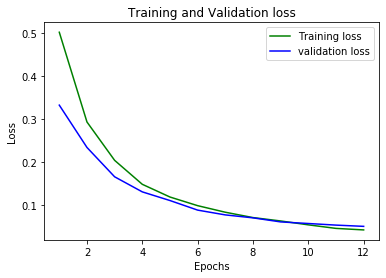

<Figure size 432x288 with 0 Axes>

In [23]:
#loss garph
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = [i for i in range(1,13)]
print(epochs)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

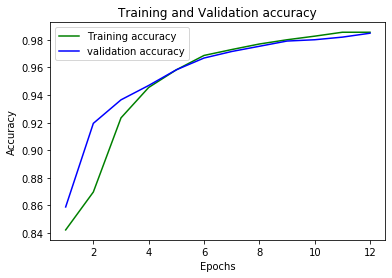

<Figure size 432x288 with 0 Axes>

In [24]:
#Accuracy graph
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = [i for i in range(1,13)]
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1102    9]
 [  14  195]]


In [18]:
#Accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.9825757575757575


In [19]:
#precision score
from sklearn.metrics import precision_score
print('Precision Score: {}'.format(precision_score(y_test, y_pred)))

Precision Score: 0.9558823529411765


In [20]:
#recall score
from sklearn.metrics import recall_score
print('Recall Score: {}'.format(recall_score(y_test, y_pred)))

Recall Score: 0.9330143540669856


In [21]:
#f1 score
from sklearn.metrics import f1_score
print('F1 Score: {}'.format(f1_score(y_test, y_pred)))

F1 Score: 0.9443099273607748


In [22]:
#Saving the model in h5 format 
classifier.save('model.h5')